In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [2]:
lc2 = pd.read_csv("C:\\Users\spand\\Downloads\\LC2_18Jan.csv")

C:\Users\spand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
lc2

,created_at,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-10-09 11:52:30 IST,57.1,51.5,75.02,27.98,1.28,0.32,0.11
1,2020-10-09 11:53:00 IST,57.5,51.6,74.86,27.99,1.23,0.33,0.11
2,2020-10-09 11:53:30 IST,59.2,53.2,74.89,27.98,1.17,0.35,0.1
3,2020-10-09 11:54:00 IST,57.5,51.8,74.86,27.96,1.17,0.36,0.09
4,2020-10-09 11:54:30 IST,58.3,52.6,74.86,27.94,1.11,0.37,0.09
...,...,...,...,...,...,...,...,...
269859,2021-01-18 18:57:30 IST,39.7,36.3,44.32,30.05,0.48,4.87,0.01
269860,2021-01-18 18:58:00 IST,39.0,35.8,44.35,30.04,0.48,4.87,0.01
269861,2021-01-18 18:58:30 IST,40.1,36.7,44.35,30.03,0.48,4.87,0.01
269862,2021-01-18 18:59:00 IST,39.4,36.2,44.35,30.04,0.48,4.83,0.02


In [4]:
lc3 = pd.read_csv("C:\\Users\spand\\Downloads\\LC3_18Jan.csv")

C:\Users\spand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
lc3

,created_at,PM10_3,PM2.5_3,RH_3,Temp_3,CO_3,NO2_3,NH3_3
0,2020-09-17 19:15:30 IST,19.1,15.1,83.26,27.72,0.48,0.20,2.2
1,2020-09-17 19:16:00 IST,19.0,15.2,83.26,27.74,0.44,0.22,1.96
2,2020-09-17 19:16:30 IST,18.6,15.0,83.35,27.72,0.44,0.24,1.7
3,2020-09-17 19:17:00 IST,18.8,15.8,83.32,27.71,0.44,0.26,1.5
4,2020-09-17 19:17:30 IST,19.3,15.9,83.38,27.71,0.44,0.28,1.36
...,...,...,...,...,...,...,...,...
310693,2021-01-18 18:58:00 IST,77.6,58.8,49.92,27.59,0.53,5.33,0.01
310694,2021-01-18 18:58:30 IST,80.8,60.0,49.95,27.59,0.53,5.28,0.01
310695,2021-01-18 18:59:00 IST,82.7,61.2,49.95,27.58,0.53,5.28,0.01
310696,2021-01-18 18:59:30 IST,79.7,59.8,50.02,27.60,0.53,5.28,0.01


In [6]:
lc2['created_at'] = pd.to_datetime(lc2['created_at'])
lc3['created_at'] = pd.to_datetime(lc3['created_at'])

C:\Users\spand\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [7]:
cpcb_oct = pd.read_csv("C:\\Users\\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_oct_15min.csv")
cpcb_nov = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_nov15min.csv")
cpcb_dec = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_dec15min.csv")

In [8]:
cpcb_oct['created_at'] = pd.to_datetime(cpcb_oct['created_at'], dayfirst = True)
cpcb_nov['created_at'] = pd.to_datetime(cpcb_nov['created_at'], dayfirst = True)
cpcb_dec['created_at'] = pd.to_datetime(cpcb_dec['created_at'], dayfirst = True)

In [10]:
oct2 = pd.merge(cpcb_oct, lc2,  
                   on='created_at',  
                   how='inner') 
oct3 = pd.merge(cpcb_oct, lc3,  
                   on='created_at',  
                   how='inner') 
nov2 = pd.merge(cpcb_nov, lc2,  
                   on='created_at',  
                   how='inner') 
nov3 = pd.merge(cpcb_nov, lc3,  
                   on='created_at',  
                   how='inner') 
dec2 = pd.merge(cpcb_dec, lc2,  
                   on='created_at',  
                   how='inner') 
dec3 = pd.merge(cpcb_dec, lc3,  
                   on='created_at',  
                   how='inner') 

In [11]:
oct2

,created_at,PM10,PM2.5,RH,Temp,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-10-09 12:30:00,95,53,63,30.6,59.7,53.8,72.35,28.82,1.28,0.45,0.08
1,2020-10-09 13:00:00,116,58,62,30,68.3,61.6,70.52,29.11,1.23,0.51,0.07
2,2020-10-09 13:15:00,116,58,59,29.9,75.9,67.8,70.58,29.06,1.17,0.53,0.07
3,2020-10-09 13:30:00,116,58,59,29.9,82.5,73.8,70.55,29.15,1.17,0.53,0.07
4,2020-10-09 13:45:00,127,69,60,30,80.1,71.9,70.17,29.19,1.23,0.53,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,2020-10-31 22:30:00,172,73,61,29.5,65.6,59.4,47.95,29.51,1,2.75,0.11
1568,2020-10-31 22:45:00,179,86,61,29.5,63.5,57.5,48.79,29.47,1.06,2.60,0.12
1569,2020-10-31 23:00:00,179,86,60,29.4,63.5,57.5,47.56,29.29,1,2.91,0.11
1570,2020-10-31 23:15:00,179,86,59,29.4,73.9,66.6,47.55,29.30,1.06,2.78,0.11


In [12]:
oct3

,created_at,PM10,PM2.5,RH,Temp,PM10_3,PM2.5_3,RH_3,Temp_3,CO_3,NO2_3,NH3_3
0,2020-10-01 00:00:00,52,36,85,29,18.9,16.9,73.18,28.06,0.58,0.46,0.6
1,2020-10-01 00:15:00,52,36,85,29,20.0,17.8,72.93,28.06,0.58,0.46,0.59
2,2020-10-01 00:30:00,52,36,86,29,21.4,18.4,73.22,27.83,0.58,0.47,0.56
3,2020-10-01 00:45:00,51,34,86,29,25.4,21.8,73.57,27.67,0.58,0.47,0.54
4,2020-10-01 01:00:00,51,34,86,29.1,17.5,15.6,73.75,27.52,0.58,0.47,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...
1942,2020-10-31 22:30:00,172,73,61,29.5,1999.9,999.9,51.66,27.84,1.64,3.74,0.13
1943,2020-10-31 22:45:00,179,86,61,29.5,1999.9,999.9,52.62,27.72,1.7,3.48,0.14
1944,2020-10-31 23:00:00,179,86,60,29.4,1999.9,999.9,50.92,27.66,1.64,4.05,0.12
1945,2020-10-31 23:15:00,179,86,59,29.4,1999.9,999.9,51.18,27.61,1.7,3.74,0.13


In [13]:
nov2

,created_at,PM10,PM2.5,RH,Temp,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-11-01 00:00:00,172,73,61,29.4,62.7,56.6,47.11,28.93,1,3.14,0.1
1,2020-11-01 00:15:00,172,73,62,29.4,61.3,55.4,48.89,28.94,1,2.60,0.11
2,2020-11-01 00:30:00,172,73,63,29.4,59.4,53.8,48.96,28.71,1.06,2.33,0.13
3,2020-11-01 00:45:00,158,80,64,29.4,60.9,55.2,49.64,28.59,1.11,1.75,0.17
4,2020-11-01 01:00:00,158,80,63,29.4,60.7,54.9,50.21,28.45,1.11,1.91,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...
2755,2020-11-30 22:30:00,188,84,76,29.3,56.3,50.3,58.78,27.74,0.68,1.36,0.08
2756,2020-11-30 22:45:00,184,86,77,29.4,57.8,51.9,58.99,27.60,0.68,1.35,0.08
2757,2020-11-30 23:00:00,184,86,78,29.3,56.6,50.4,59.65,27.38,0.68,1.40,0.08
2758,2020-11-30 23:15:00,184,86,78,29.4,56.4,50.8,59.60,27.32,0.68,1.39,0.08


In [14]:
nov3

,created_at,PM10,PM2.5,RH,Temp,PM10_3,PM2.5_3,RH_3,Temp_3,CO_3,NO2_3,NH3_3
0,2020-11-01 00:00:00,172,73,61,29.4,1999.9,999.9,50.70,27.27,1.64,4.35,0.11
1,2020-11-01 00:15:00,172,73,62,29.4,1999.9,999.9,53.04,27.04,1.7,3.55,0.13
2,2020-11-01 00:30:00,172,73,63,29.4,1999.9,999.9,52.98,26.87,1.64,3.94,0.13
3,2020-11-01 00:45:00,158,80,64,29.4,1999.9,999.9,54.26,26.56,1.64,3.46,0.13
4,2020-11-01 01:00:00,158,80,63,29.4,1999.9,999.9,54.56,26.50,1.64,3.69,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...
2754,2020-11-30 22:30:00,188,84,76,29.3,119.9,75.4,63.26,26.21,1.17,2.20,0.06
2755,2020-11-30 22:45:00,184,86,77,29.4,114.9,76.0,63.83,25.98,1.17,2.21,0.06
2756,2020-11-30 23:00:00,184,86,78,29.3,120.7,75.8,64.55,25.75,1.17,2.22,0.05
2757,2020-11-30 23:15:00,184,86,78,29.4,111.0,77.8,64.72,25.63,1.17,2.22,0.05


In [15]:
dec2

,created_at,PM10,PM2.5,RH,Temp,PM10_2,PM2.5_2,RH_2,Temp_2,CO_2,NO2_2,NH3_2
0,2020-12-01 00:00:00,171,86,78,29.3,57.2,51.2,60.02,26.92,0.63,1.43,0.07
1,2020-12-01 00:15:00,171,86,79,29.3,60.1,53.8,60.35,26.65,0.63,1.39,0.07
2,2020-12-01 00:30:00,171,86,79,29.3,58.5,52.5,60.40,26.54,0.63,1.58,0.06
3,2020-12-01 00:45:00,153,79,80,29.3,58.1,52.7,60.57,26.50,0.63,1.65,0.06
4,2020-12-01 01:00:00,153,79,80,29.4,59.2,53.6,60.49,26.50,0.63,1.50,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2567,2021-01-01 08:30:00,152,84,75,29.4,124.8,114.4,58.89,26.49,0.58,8.21,0.01
2568,2021-01-01 08:45:00,170,78,74,29.4,127.3,116.8,58.02,26.61,0.58,7.93,0.01
2569,2021-01-01 09:00:00,170,78,72,29.3,124.2,113.8,56.91,27.20,0.63,7.67,0.01
2570,2021-01-01 09:15:00,170,78,69,29.3,122.0,112.1,54.81,27.89,0.63,7.93,0.01


In [16]:
dec3

,created_at,PM10,PM2.5,RH,Temp,PM10_3,PM2.5_3,RH_3,Temp_3,CO_3,NO2_3,NH3_3
0,2020-12-01 00:00:00,171,86,78,29.3,128.7,83.0,65.33,25.17,1.11,2.19,0.06
1,2020-12-01 00:15:00,171,86,79,29.3,115.4,80.0,65.43,25.07,1.11,2.32,0.05
2,2020-12-01 00:30:00,171,86,79,29.3,116.3,81.5,65.52,24.97,1.06,2.56,0.05
3,2020-12-01 00:45:00,153,79,80,29.3,120.0,82.8,65.88,24.88,1.06,2.68,0.05
4,2020-12-01 01:00:00,153,79,80,29.4,116.4,81.6,66.20,24.75,1.06,2.56,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
2592,2021-01-01 08:30:00,152,84,75,29.4,243.3,186.8,65.39,24.48,0.74,11.83,0.01
2593,2021-01-01 08:45:00,170,78,74,29.4,252.6,189.1,63.76,24.88,0.79,11.29,0.01
2594,2021-01-01 09:00:00,170,78,72,29.3,236.8,185.5,62.40,25.45,0.79,10.96,0.01
2595,2021-01-01 09:15:00,170,78,69,29.3,226.4,176.8,60.09,26.08,0.79,11.64,0.01


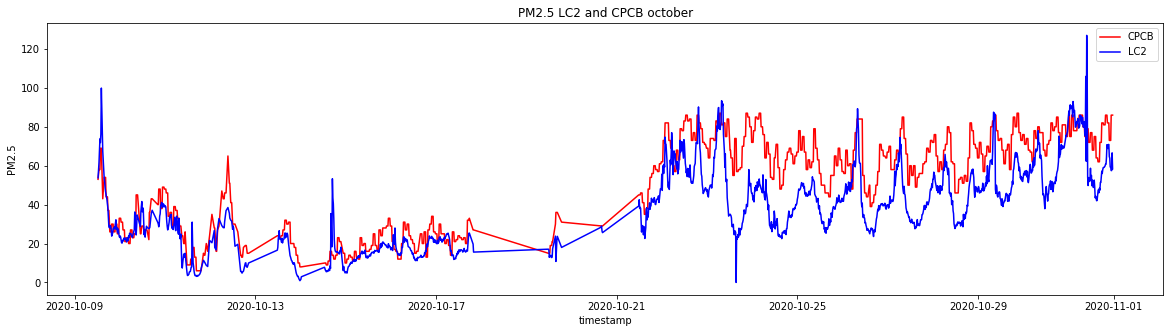

In [17]:
x = oct2['created_at']
y1 = oct2['PM2.5']
y2 = oct2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB october')
plt.show()

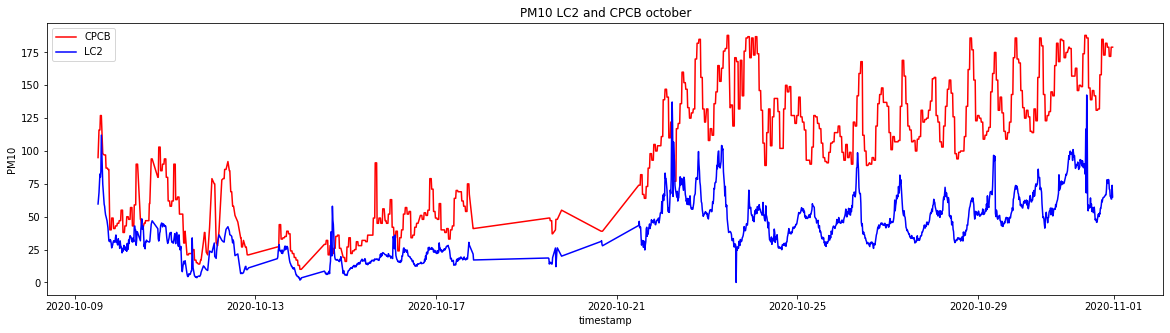

In [18]:
x = oct2['created_at']
y_1 = oct2['PM10']
y_2 = oct2['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_1, 'r') 
plt.plot(x, y_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB october')
plt.show()

max correlation is at lag 1
max correlation is  0.862
Pearsons correlation: 0.861
MSE PM2.5:  330.884096692112
MAE PM2.5:  14.712468193384224
RMSE PM2.5:  18.190219808790438


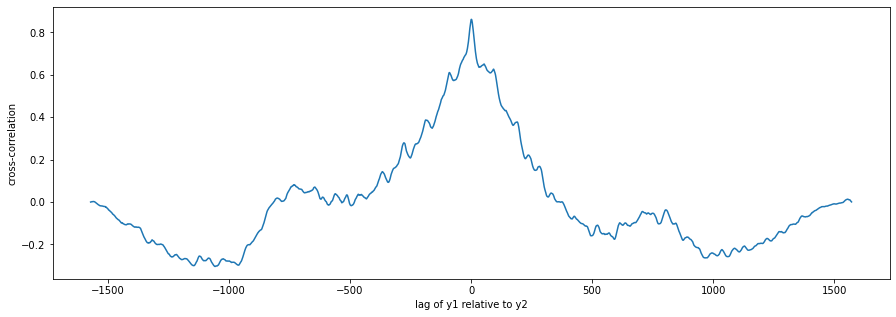

In [19]:
npts = len(oct2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2['PM2.5_2'], oct2['PM2.5'])
MAE = mean_absolute_error(oct2['PM2.5_2'], oct2['PM2.5'])
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(oct2['PM2.5_2'], oct2['PM2.5'])))

max correlation is at lag 2
max correlation is  0.788
Pearsons correlation: 0.786
MSE PM10:  4575.456081424936
MAE PM10:  58.5145038167939
RMSE PM10:  67.64211765922867


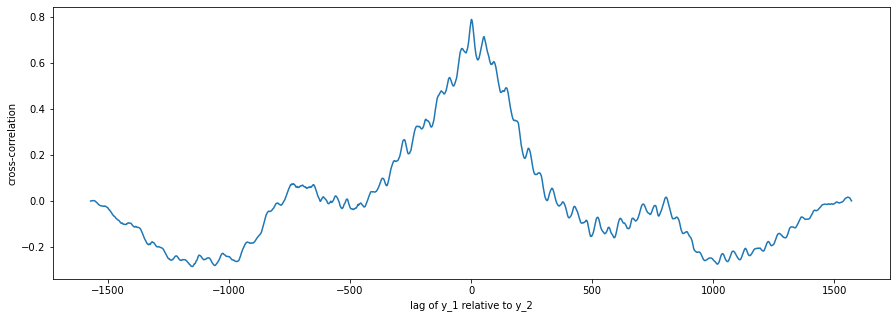

In [20]:
npts = len(oct2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_1 - y_1.mean(), y_2 - y_2.mean(), mode='full')
ccor = ccov / (npts * y_1.std() * y_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_1 relative to y_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_1, y_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2['PM10_2'], oct2['PM10'])
MAE = mean_absolute_error(oct2['PM10_2'], oct2['PM10'])
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(oct2['PM10_2'], oct2['PM10'])))

In [21]:
oct2_rh = oct2[oct2['RH_2'] < 75]

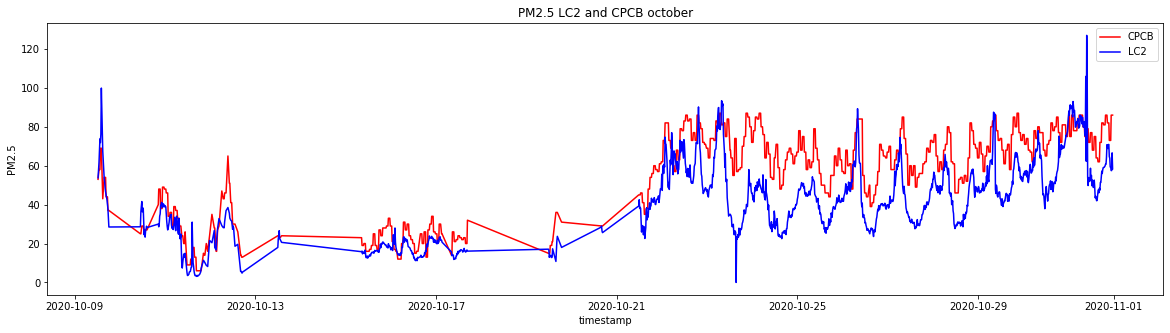

In [22]:
x = oct2_rh['created_at']
y11 = oct2_rh['PM2.5']
y22 = oct2_rh['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y22, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB october')
plt.show()

max correlation is at lag 1
max correlation is  0.839
Pearsons correlation: 0.837
MSE:  374.56292988929886
MAE:  16.14191881918819
RMSE  19.353628339133177


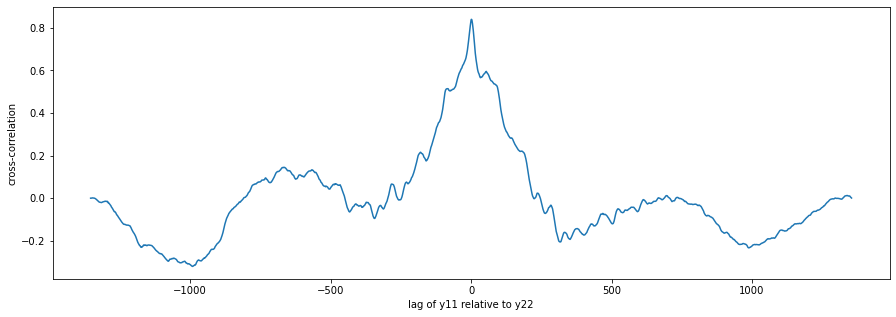

In [23]:
npts = len(oct2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y11 - y11.mean(), y22 - y22.mean(), mode='full')
ccor = ccov / (npts * y11.std() * y22.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y11 relative to y22')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y11, y22) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])
MAE = mean_absolute_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])))

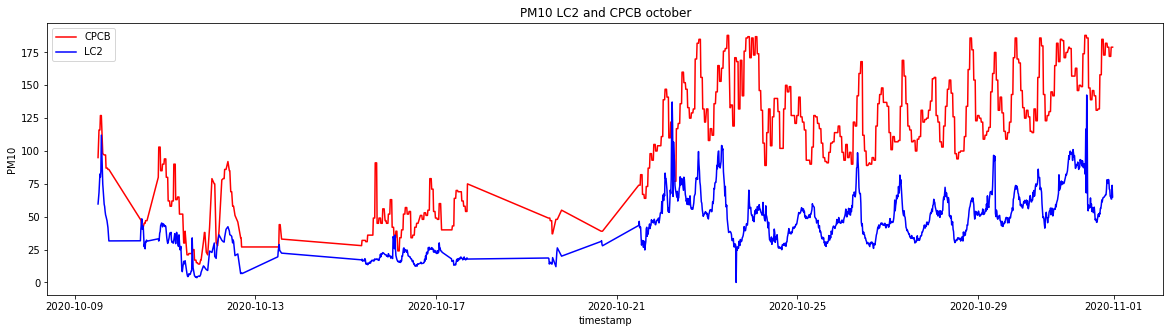

In [24]:
x = oct2_rh['created_at']
y1_1 = oct2_rh['PM10']
y2_2 = oct2_rh['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_1, 'r') 
plt.plot(x, y2_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB october')
plt.show()

max correlation is at lag 2
max correlation is  0.748
Pearsons correlation: 0.744
MSE:  5248.906664206642
MAE:  65.22073800738008
RMSE  72.44933860434229


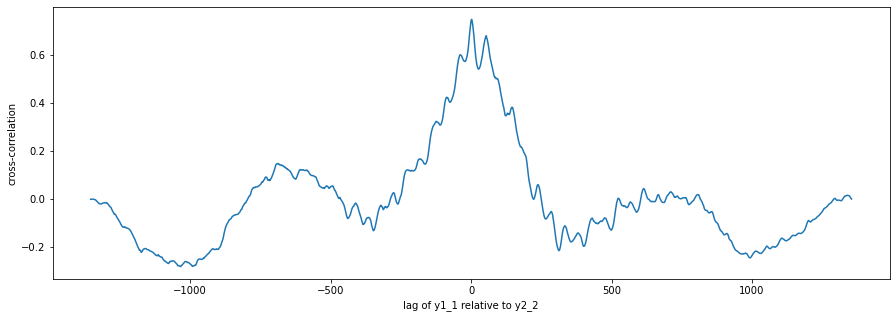

In [25]:
npts = len(oct2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1_1 - y1_1.mean(), y2_2 - y2_2.mean(), mode='full')
ccor = ccov / (npts * y1_1.std() * y2_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1_1 relative to y2_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1_1, y2_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2_rh['PM10_2'], oct2_rh['PM10'])
MAE = mean_absolute_error(oct2_rh['PM10_2'], oct2_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct2_rh['PM10_2'], oct2_rh['PM10'])))

Coefficients:  [[0.93724549]]
Intercept:  [17.98661424]
R2  0.7403691015720871
MAE of simple linear regression 9.775796211548442
MSE of simple linear regression 136.054945407109
RMSE of simple linear regression 11.664259316695123
Test data Spearman correlation of simple linear regression: 0.883
Train data Spearman correlation of simple linear regression: 0.857
Mean Absolute Error Random Forest: 8.129141184450175
Mean Squared Error Random Forest: 117.0496936872154
Root Mean Squared Error Random Forest: 10.818950674035602
Test data R-2 score Random Forest: 0.777
Test data Spearman correlation Random Forest: 0.836


<ipython-input-26-4b3ee8463f52>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


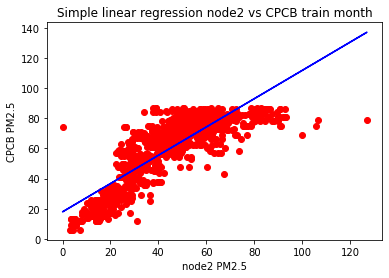

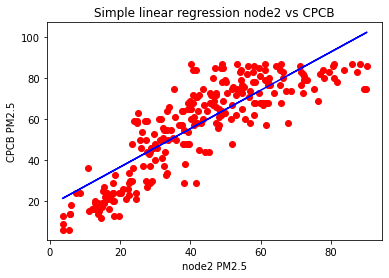

In [26]:
msk = (np.random.rand(len(oct2_rh)) < 0.8)
train = oct2_rh[msk]
test = oct2_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [27]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 1.44861127 -0.45988136]]
Intercept:  [17.89554744]
R2  0.7404912768272968
MAE  9.75853348155852
MSE  135.9909216419166
RMSE  11.66151455180315
variance score = 0.7444297961649653
Test data Spearman correlation: 0.883
Mean Absolute Error Random Forest: 8.06430711610487
Mean Squared Error Random Forest: 109.07344007490636
Root Mean Squared Error Random Forest: 10.443823058387496
Test data R-2 score Random Forest: 0.792
Test data Spearman correlation Random Forest: 0.844


<ipython-input-27-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)
